In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv("Global_Superstore.csv")  # Replace with actual dataset file path


In [25]:
print(df.info())  # Column details and data types
print(df.describe())  
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [26]:
# Check for missing values
print(df.isnull().sum())

# Ensure df is a new copy to avoid SettingWithCopyWarning
df = df.copy()

# Fill missing values only in numeric columns
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Drop remaining missing values (if any)
df.dropna(inplace=True)


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


In [27]:
df.drop_duplicates(inplace=True)


In [28]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


In [29]:
# Basic statistics
print(df[['Sales', 'Profit']].describe())

# Correlation analysis
correlation_matrix = df[['Sales', 'Profit']].corr()
print(correlation_matrix)


             Sales       Profit
count   979.000000   979.000000
mean   1621.197783   256.863023
std    1099.445332   506.319257
min       1.910000 -3059.820000
25%     820.010000     8.700000
50%    1554.480000   182.690000
75%    2424.320000   505.490000
max    4876.880000  1989.540000
           Sales    Profit
Sales   1.000000  0.421281
Profit  0.421281  1.000000


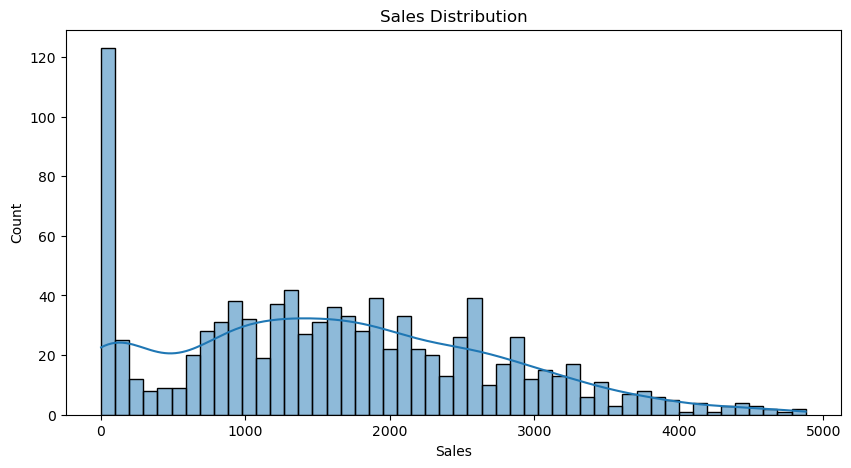

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()


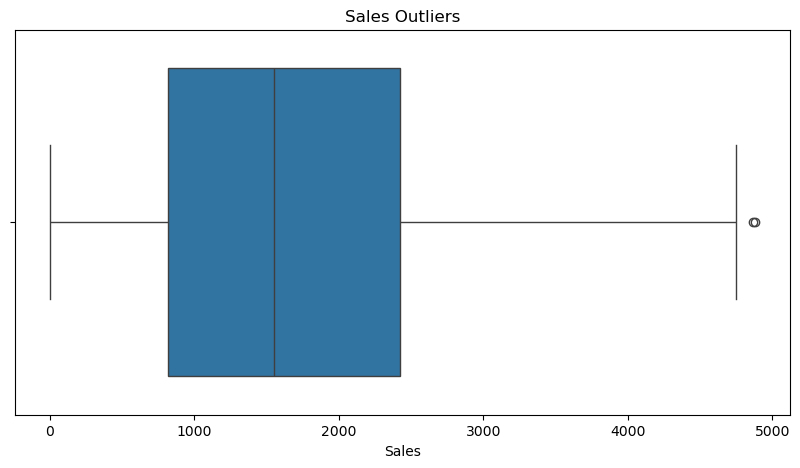

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers")
plt.show()


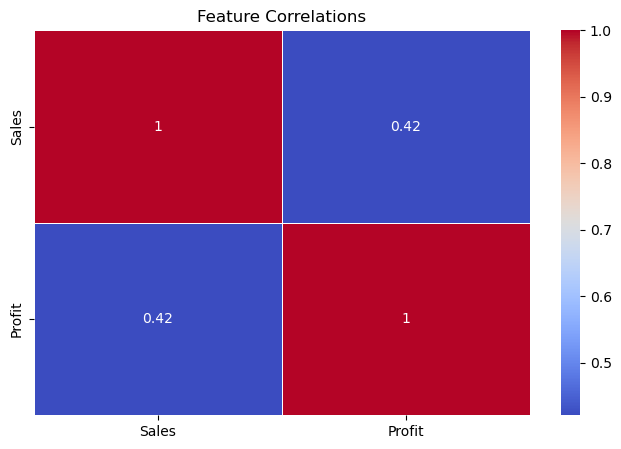

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


In [33]:
df.to_csv("Global_Superstore_Cleaned.csv", index=False)
